In [72]:
import tensorflow as tf 
print(tf.__version__)

2.0.0


In [1]:
!pip uninstall tensorflow -y

Uninstalling tensorflow-1.15.0:
  Successfully uninstalled tensorflow-1.15.0


In [2]:
!pip install tensorflow==2.0.0

  Using cached https://files.pythonhosted.org/packages/46/0f/7bd55361168bb32796b360ad15a25de6966c9c1beb58a8e30c01c8279862/tensorflow-2.0.0-cp36-cp36m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/76/54/99b9d5d52d5cb732f099baaaf7740403e83fe6b0cedde940fabd2b13d75a/tensorboard-2.0.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fc/08/8b927337b7019c374719145d1dceba21a8bb909b93b1ad6f8fb7d22c1ca1/tensorflow_estimator-2.0.1-py2.py3-none-any.whl
ERROR: tensorflow-serving-api 1.15.0 has requirement tensorflow~=1.15.0, but you'll have tensorflow 2.0.0 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.10.1 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfull

In [20]:
import os
import boto3
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sagemaker
from sagemaker import get_execution_role

session = sagemaker.Session()

role = get_execution_role()
region = sagemaker_session.boto_session.region_name 

print(tf.__version__)

2.0.0


In [15]:
model = tf.keras.applications.ResNet50(weights='imagenet')

In [24]:
#session.download_data("images","sagemaker-us-east-1-731833107751","transfer-learning-data/African_Elephant.jpg")
session.download_data("images","sagemaker-us-east-1-731833107751","transfer-learning-data")

In [30]:
Sample_Image = tf.keras.preprocessing.image.load_img("images/African_Elephant.jpg", target_size=(224,224))


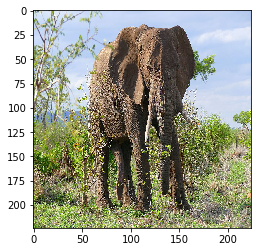

In [31]:
plt.imshow(Sample_Image)

In [32]:
Sample_Image = tf.keras.preprocessing.image.img_to_array(Sample_Image)

In [33]:
np.shape(Sample_Image)

(224, 224, 3)

In [34]:
Sample_Image = np.expand_dims(Sample_Image, axis=0)
np.shape(Sample_Image)

(1, 224, 224, 3)

In [35]:
Sample_Image.max()

255.0

In [36]:
Sample_Image.min()

0.0

In [37]:
Sample_Image = tf.keras.applications.resnet50.preprocess_input(Sample_Image)

In [38]:
Sample_Image.max()

151.061

In [39]:
Sample_Image.min()

-123.68

In [40]:
predictions = model.predict(Sample_Image)

In [41]:
print("predictions:", tf.keras.applications.resnet50.decode_predictions(predictions, top=2)[0])

40960/35363 [==================================] - 0s 0us/step
predictions: [('n01871265', 'tusker', 0.65755874), ('n02113799', 'standard_poodle', 0.12074366)]


In [42]:
# Step 4: Apply Transfer Learning and Retrain the Model

base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top = False)

94773248/94765736 [==============================] - 2s 0us/step


In [43]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [44]:
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(2, activation = 'softmax')(x)

In [45]:
model = tf.keras.models.Model(inputs = base_model.input, outputs = preds)

In [46]:
len(model.layers)

181

In [ ]:
# for i, layer in enumerate(model.layers):
#     print(i, layer.name)

In [47]:
# the original resnet layers are exluded in the training
for layer in model.layers[:175]:
    layer.trainable = False

In [48]:
# the newly added layers are in the training
for layer in model.layers[175:]:
    layer.trainable = True

In [50]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

In [51]:
train_generator = train_datagen.flow_from_directory("images/train/",
                                                    target_size = (224, 224),
                                                    color_mode = 'rgb',
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    shuffle = True)

Found 202 images belonging to 2 classes.


In [52]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [53]:
history = model.fit_generator(generator = train_generator, steps_per_epoch=train_generator.n//train_generator.batch_size, epochs=5)

Epoch 1/5
6/6 [==============================] - 65s 11s/step - loss: 1.6657 - accuracy: 0.5417
Epoch 2/5
6/6 [==============================] - 50s 8s/step - loss: 0.2791 - accuracy: 0.8986
Epoch 3/5
6/6 [==============================] - 57s 10s/step - loss: 0.1095 - accuracy: 0.9706
Epoch 4/5
6/6 [==============================] - 58s 10s/step - loss: 0.0653 - accuracy: 0.9706
Epoch 5/5
6/6 [==============================] - 57s 10s/step - loss: 0.0204 - accuracy: 0.9882


In [54]:
# Step 5: Evaluate the Model

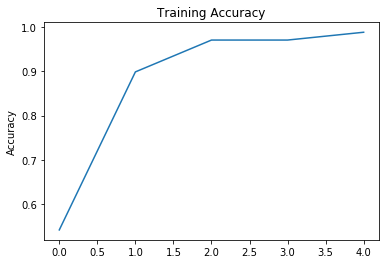

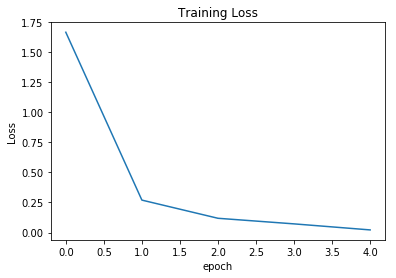

In [55]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure()
plt.plot(acc, label='Training Accuracy')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.figure()

plt.plot(loss, label='Training Loss')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

In [63]:
Sample_Image = tf.keras.preprocessing.image.load_img('images/cat.282.jpg', target_size = (224, 224))

In [57]:
Sample_Image = tf.keras.preprocessing.image.load_img('images/dog.309.jpg', target_size = (224, 224))

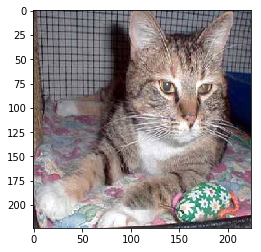

In [64]:
plt.imshow(Sample_Image)

In [65]:
Sample_Image = tf.keras.preprocessing.image.img_to_array(Sample_Image)
np.shape(Sample_Image)

(224, 224, 3)

In [66]:
Sample_Image = np.expand_dims(Sample_Image, axis=0)
np.shape(Sample_Image)

(1, 224, 224, 3)

In [67]:
Sample_Image = tf.keras.applications.resnet50.preprocess_input(Sample_Image)
predictions = model.predict(Sample_Image)
print("Predictions:", predictions)

Predictions: [[9.999095e-01 9.048371e-05]]


In [71]:
print("Cat: {}  Dog: {}".format(predictions[0][0], predictions[0][1]))

Cat: 0.999909520149231  Dog: 9.048370702657849e-05
